<h1 align="center">Mathematical Methods in Engineering - Course Code: 25872</h1>
<h4 align="center">Instructor: Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>
<h4 align="center">Computer Assignment 3</h4>
<h4 align="center">

Questions 1 & 2: [Zahra maleki](https://t.me/Rosebaekfany), Questions 3: [Radin Khayyam](https://t.me/Radinkhayyam)

</h4>

<p>
    Write your code in the <span style="color: green;">Code Cell</span> and run the <span style="color: green;">Evaluation Cell</span> to check the output.<br>
    <span style="color: red; font-weight: bold;">Please refrain from editing the existing codes.</span>
</p>


In [33]:
Name = "Mohammad Sadra Yeganeh-Faal"
Student_Number = "401102818"

### Importing necessary libraries

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from PIL import Image
import time
from numpy import asarray
from sklearn.utils.extmath import randomized_svd
import requests

ModuleNotFoundError: No module named 'requests'

In [ ]:
np.random.RandomState(0)

## Problem 1: SVD for Compression ``(35 pt.)``

In this question, we want to compress BMP images using SVD. BMP images are not compressed by default and the pixel information is stored in rather a simple format. Colored BMP files are composed of three matrices of size $n × m$ where $n$ and $m$ are the height and width of the image, respectively. Each matrix corresponds to one of the three colors Red, Green, and Blue. Each entry of these matrices is a number between 0 and 255 that specifies the intensity of the corresponding color. The final array is hence a 3D array of size $n × m × 3$.

### 1.1 Image display
Choose two arbitrary BMP files (it is recommended to use different subjects and sizes) and load it into a `numpy` array using the `imread` function. Then, show each image and display their shape.

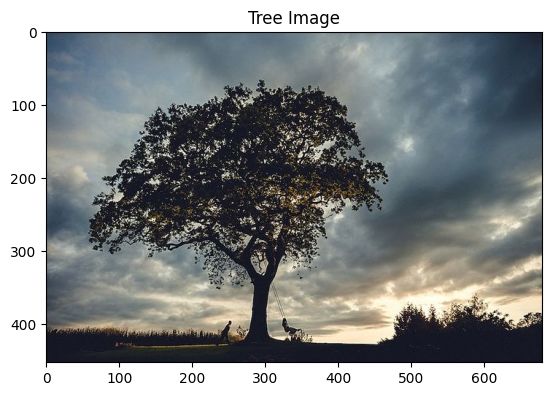

Tree Image shape: (453, 680, 3)


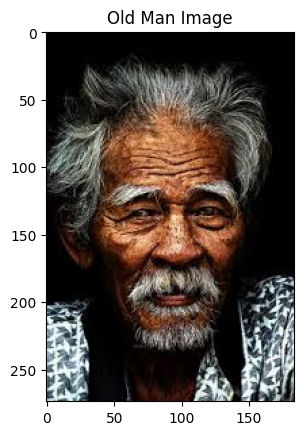

Old Man Image shape: (274, 184, 3)


In [ ]:
# Load first BMP image: tree.bmp
image1 = imread('tree.bmp')
plt.imshow(image1)
plt.title('Tree Image')
plt.show()
print('Tree Image shape:', image1.shape)

# Load second BMP image: oldman.bmp
image2 = imread('oldman.bmp')
plt.imshow(image2)
plt.title('Old Man Image')
plt.show()
print('Old Man Image shape:', image2.shape)

### 1.2 Singular Value Decomposition and channel seperation

Calculate the SVD decomposition of each of ech RGB channel.

$$
A = U \Sigma V^T
$$
where $A$ is the original array, $U$ is an $n × n$ unitary matrix, $\Sigma$ is an $n × m$ rectangular diagonal matrix with non-negative real numbers on the diagonal, and $V$ is an $m × m$ unitary matrix.

In [ ]:
# Load the 'oldman.bmp' image
oldman_image = Image.open('oldman.bmp')
oldman_image_array = np.array(oldman_image)

# Load the 'tree.bmp' image
tree_image = Image.open('tree.bmp')
tree_image_array = np.array(tree_image)

# Separate the images into their RGB channels
oldman_red_channel = oldman_image_array[:, :, 0]
oldman_green_channel = oldman_image_array[:, :, 1]
oldman_blue_channel = oldman_image_array[:, :, 2]

tree_red_channel = tree_image_array[:, :, 0]
tree_green_channel = tree_image_array[:, :, 1]
tree_blue_channel = tree_image_array[:, :, 2]

# Perform SVD on each RGB channel for the 'oldman.bmp' image
U_r_oldman, S_r_oldman, Vt_r_oldman = np.linalg.svd(oldman_red_channel)
U_g_oldman, S_g_oldman, Vt_g_oldman = np.linalg.svd(oldman_green_channel)
U_b_oldman, S_b_oldman, Vt_b_oldman = np.linalg.svd(oldman_blue_channel)

# Perform SVD on each RGB channel for the 'tree.bmp' image
U_r_tree, S_r_tree, Vt_r_tree = np.linalg.svd(tree_red_channel)
U_g_tree, S_g_tree, Vt_g_tree = np.linalg.svd(tree_green_channel)
U_b_tree, S_b_tree, Vt_b_tree = np.linalg.svd(tree_blue_channel)

# Print the shapes of U, Σ, and V^T matrices for each channel in both images
print("SVD decomposition for 'oldman.bmp' image:")
print("Red Channel:")
print("U shape:", U_r_oldman.shape)
print("Σ shape:", S_r_oldman.shape)
print("V^T shape:", Vt_r_oldman.shape)

print("\nGreen Channel:")
print("U shape:", U_g_oldman.shape)
print("Σ shape:", S_g_oldman.shape)
print("V^T shape:", Vt_g_oldman.shape)

print("\nBlue Channel:")
print("U shape:", U_b_oldman.shape)
print("Σ shape:", S_b_oldman.shape)
print("V^T shape:", Vt_b_oldman.shape)

print("\nSVD decomposition for 'tree.bmp' image:")
print("Red Channel:")
print("U shape:", U_r_tree.shape)
print("Σ shape:", S_r_tree.shape)
print("V^T shape:", Vt_r_tree.shape)

print("\nGreen Channel:")
print("U shape:", U_g_tree.shape)
print("Σ shape:", S_g_tree.shape)
print("V^T shape:", Vt_g_tree.shape)

print("\nBlue Channel:")
print("U shape:", U_b_tree.shape)
print("Σ shape:", S_b_tree.shape)
print("V^T shape:", Vt_b_tree.shape)

SVD decomposition for 'oldman.bmp' image:
Red Channel:
U shape: (274, 274)
Σ shape: (184,)
V^T shape: (184, 184)

Green Channel:
U shape: (274, 274)
Σ shape: (184,)
V^T shape: (184, 184)

Blue Channel:
U shape: (274, 274)
Σ shape: (184,)
V^T shape: (184, 184)

SVD decomposition for 'tree.bmp' image:
Red Channel:
U shape: (453, 453)
Σ shape: (453,)
V^T shape: (680, 680)

Green Channel:
U shape: (453, 453)
Σ shape: (453,)
V^T shape: (680, 680)

Blue Channel:
U shape: (453, 453)
Σ shape: (453,)
V^T shape: (680, 680)


### 1.3 compressing the image

Since eigenvalues in the decomposition are sorted in descending order, we can approximate the original array by keeping only the first $k$ columns of $U$, first $k$ rows and columns of $\Sigma$, and first $k$ rows of $V^T$.
Select $k$ to be (5, 10, 20, 30, 50, 100, 200, 250) and approximate the original array using the truncated SVD. Show the approximated image titled with the value of $k$.

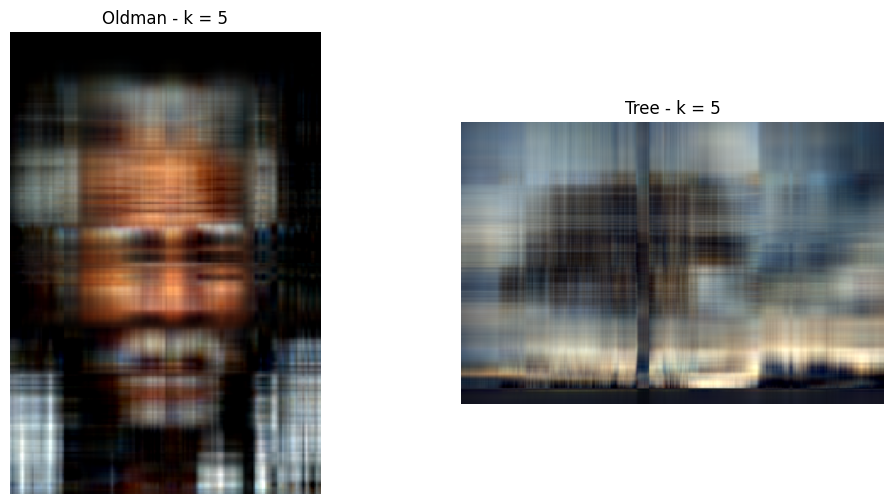

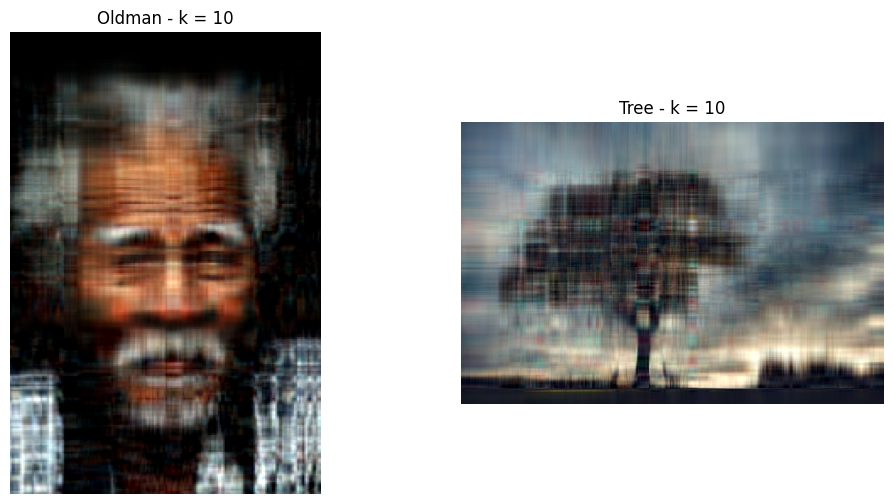

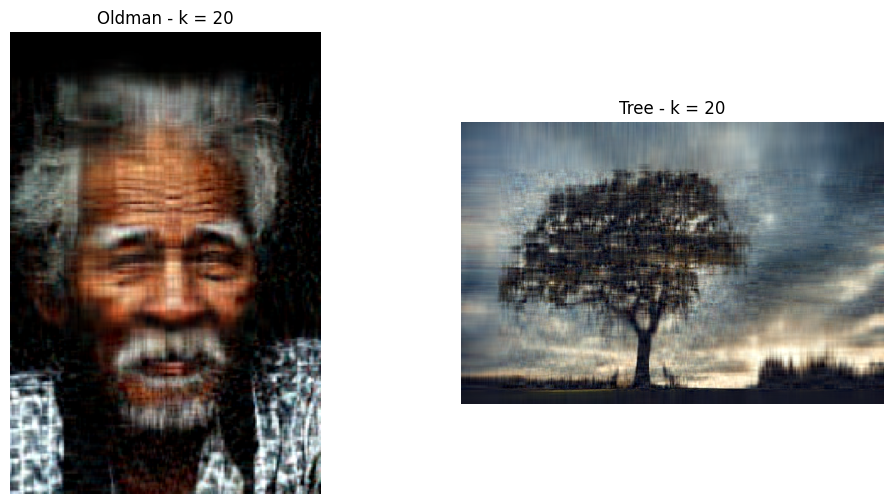

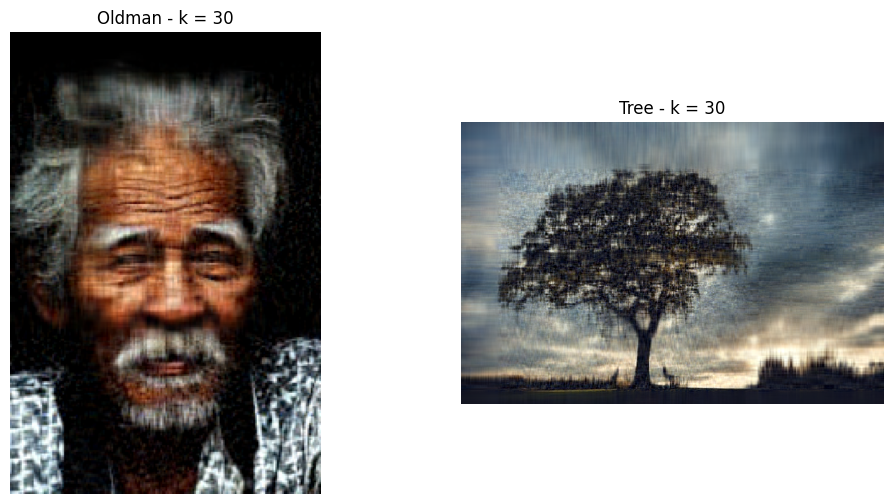

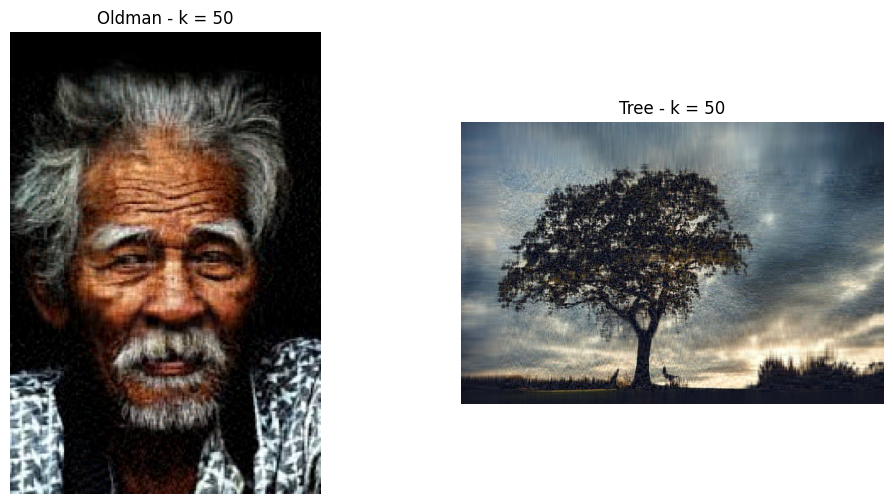

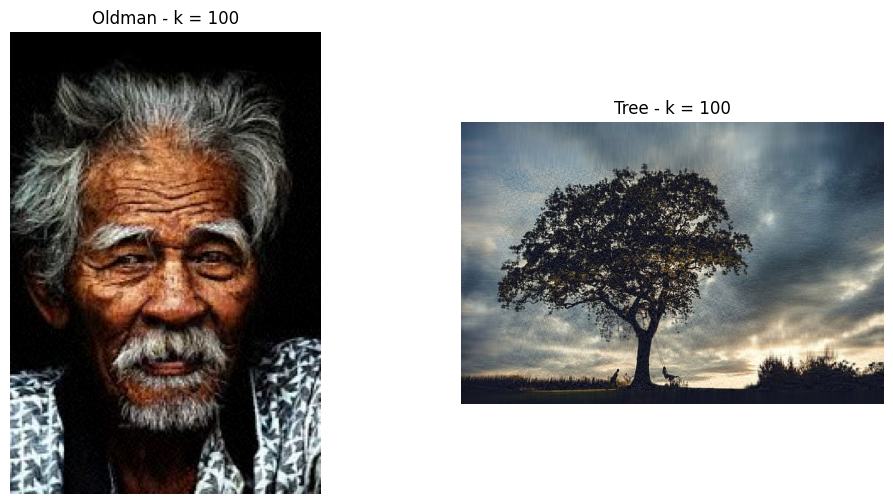

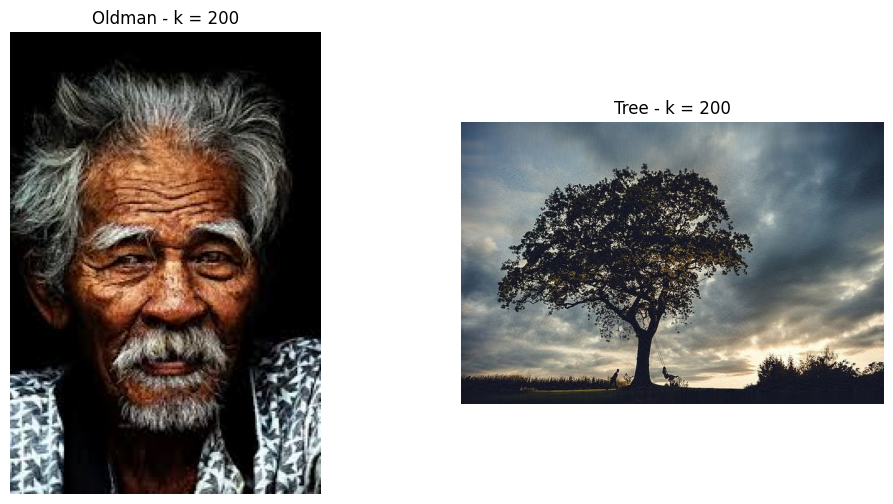

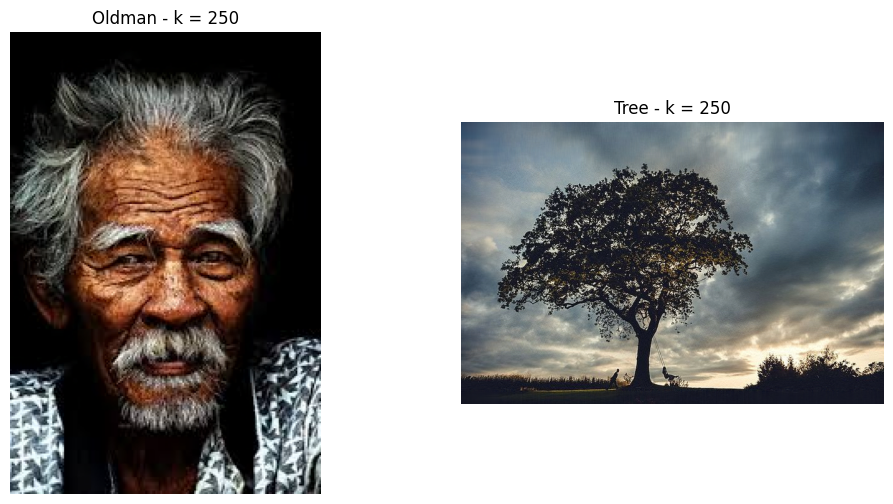

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the "tree.bmp" image
image_tree = Image.open('tree.bmp')
image_array_tree = np.array(image_tree)

# Separate the tree image into its RGB channels
red_channel_tree = image_array_tree[:, :, 0]
green_channel_tree = image_array_tree[:, :, 1]
blue_channel_tree = image_array_tree[:, :, 2]

# Perform SVD on each color channel of the tree image
U_r_tree, S_r_tree, Vt_r_tree = np.linalg.svd(red_channel_tree, full_matrices=False)
U_g_tree, S_g_tree, Vt_g_tree = np.linalg.svd(green_channel_tree, full_matrices=False)
U_b_tree, S_b_tree, Vt_b_tree = np.linalg.svd(blue_channel_tree, full_matrices=False)

# Load the "oldman.bmp" image
image_oldman = Image.open('oldman.bmp')
image_array_oldman = np.array(image_oldman)

# Separate the oldman image into its RGB channels
red_channel_oldman = image_array_oldman[:, :, 0]
green_channel_oldman = image_array_oldman[:, :, 1]
blue_channel_oldman = image_array_oldman[:, :, 2]

# Perform SVD on each color channel of the oldman image
U_r_oldman, S_r_oldman, Vt_r_oldman = np.linalg.svd(red_channel_oldman, full_matrices=False)
U_g_oldman, S_g_oldman, Vt_g_oldman = np.linalg.svd(green_channel_oldman, full_matrices=False)
U_b_oldman, S_b_oldman, Vt_b_oldman = np.linalg.svd(blue_channel_oldman, full_matrices=False)

# Select values of k
k_values = [5, 10, 20, 30, 50, 100, 200, 250]

# Iterate over each k value and display the approximated images side by side
for k in k_values:
    # Approximate the oldman image
    red_approx_oldman = np.dot(U_r_oldman[:, :k], np.dot(np.diag(S_r_oldman[:k]), Vt_r_oldman[:k, :]))
    red_approx_oldman[red_approx_oldman < 0] = 0
    red_approx_oldman[red_approx_oldman > 255] = 255

    green_approx_oldman = np.dot(U_g_oldman[:, :k], np.dot(np.diag(S_g_oldman[:k]), Vt_g_oldman[:k, :]))
    green_approx_oldman[green_approx_oldman < 0] = 0
    green_approx_oldman[green_approx_oldman > 255] = 255

    blue_approx_oldman = np.dot(U_b_oldman[:, :k], np.dot(np.diag(S_b_oldman[:k]), Vt_b_oldman[:k, :]))
    blue_approx_oldman[blue_approx_oldman < 0] = 0
    blue_approx_oldman[blue_approx_oldman > 255] = 255

    approx_image_oldman = np.stack((red_approx_oldman, green_approx_oldman, blue_approx_oldman), axis=2).astype(np.uint8)
    approx_image_oldman = Image.fromarray(approx_image_oldman)

    # Approximate the tree image
    red_approx_tree = np.dot(U_r_tree[:, :k], np.dot(np.diag(S_r_tree[:k]), Vt_r_tree[:k, :]))
    red_approx_tree[red_approx_tree < 0] = 0
    red_approx_tree[red_approx_tree > 255] = 255

    green_approx_tree = np.dot(U_g_tree[:, :k], np.dot(np.diag(S_g_tree[:k]), Vt_g_tree[:k, :]))
    green_approx_tree[green_approx_tree < 0] = 0
    green_approx_tree[green_approx_tree > 255] = 255

    blue_approx_tree = np.dot(U_b_tree[:, :k], np.dot(np.diag(S_b_tree[:k]), Vt_b_tree[:k, :]))
    blue_approx_tree[blue_approx_tree < 0] = 0
    blue_approx_tree[blue_approx_tree > 255] = 255

    approx_image_tree = np.stack((red_approx_tree, green_approx_tree, blue_approx_tree), axis=2).astype(np.uint8)
    approx_image_tree = Image.fromarray(approx_image_tree)

    # Display the approximated images side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    ax1, ax2 = axes

    ax1.imshow(approx_image_oldman)
    ax1.set_title(f'Oldman - k = {k}')
    ax1.axis('off')

    ax2.imshow(approx_image_tree)
    ax2.set_title(f'Tree - k = {k}')
    ax2.axis('off')

    plt.show()

#### expliane your results.

Explain the relationship between the number of components and the level of compression in the images. How does the image quality change with increasing values of k?

<b><span style='color: #FEFCFF;'>
As the value of k increases, more details and finer features of the original image are preserved in the approximation, resulting in higher image quality. However, this also means that the file size of the approximation will be larger due to retaining more information. On the other hand, using lower values of k will result in lower image quality as more details are lost, but the file size of the approximation will be smaller due to higher compression.

Therefore, the relationship between the number of components (k) and the image quality in approximated images is directly proportional - higher k values lead to better image quality, while lower k values lead to higher compression and reduced image quality.
</span></b>

### 1.4 variance

there is no need to store $U$ and $V$ matrices. Instead, we can store $\Sigma$ and two other matrices of size $n × k$ and $m × k$. Using $\Sigma$ display the plots below. To not compress the image based on a given random number k, we are required to do some math & statistics

1. The plot "Component Importance" shows the  amount  of variance each component carries. The first component preserves the highest variance, then the second, and so on.
2. The plot shows the explained variance as a function of numbers, using this technique you can choose how much the image, relative to its original size gets compressed.

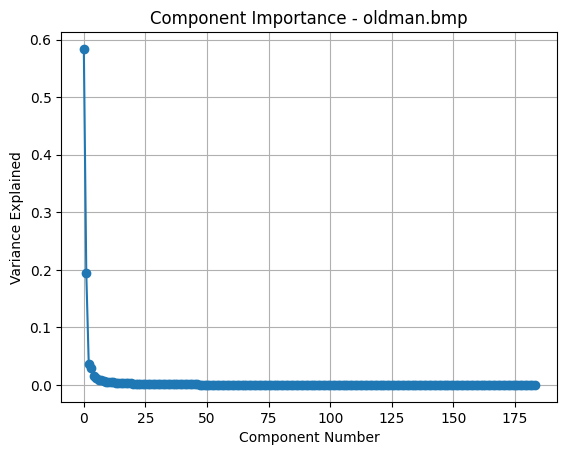

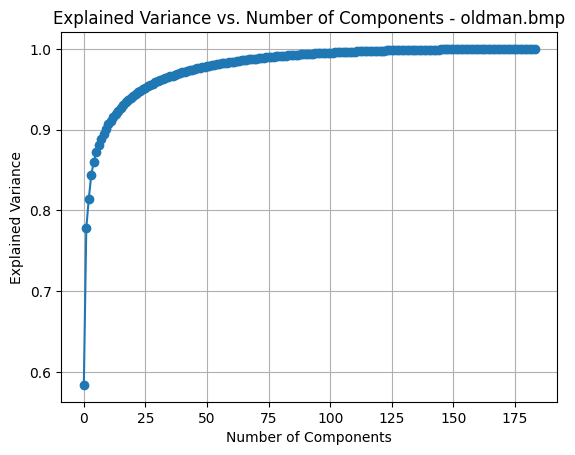

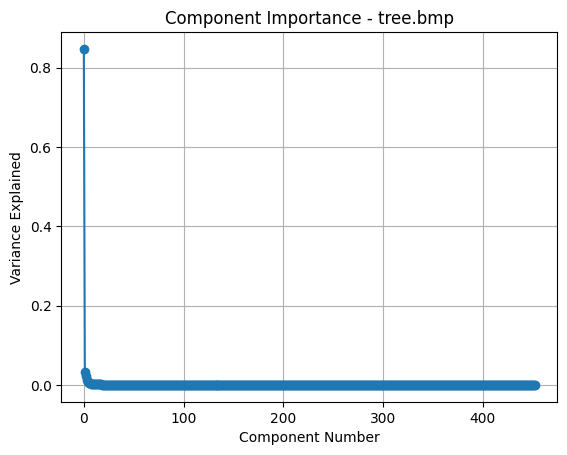

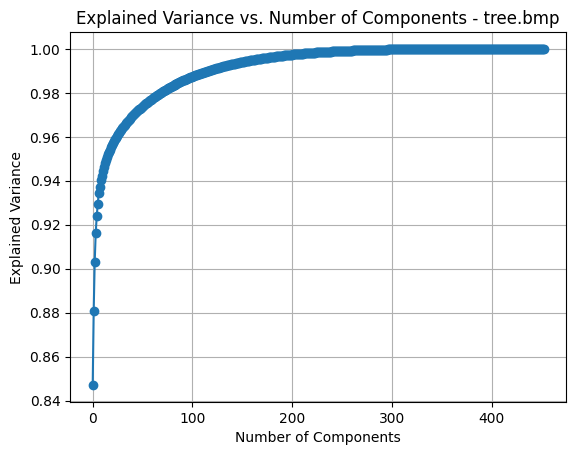

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the images
oldman_image = Image.open("oldman.bmp").convert("L")
tree_image = Image.open("tree.bmp").convert("L")

# Convert images to numpy arrays
oldman_image_pixels = np.array(oldman_image).astype(float)
tree_image_pixels = np.array(tree_image).astype(float)

def compress_image(image_pixels, singular_values, principal_components, num_components):
    compressed_image = np.dot(image_pixels, principal_components.T[:, :num_components])
    reconstructed_image = np.dot(compressed_image, principal_components[:num_components, :])
    
    return reconstructed_image

def display_image(image_pixels, title):
    plt.figure()
    plt.imshow(image_pixels, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Perform Singular Value Decomposition (SVD) on the image matrices
U_oldman, singular_values_oldman, Vt_oldman = np.linalg.svd(oldman_image_pixels, full_matrices=False)
U_tree, singular_values_tree, Vt_tree = np.linalg.svd(tree_image_pixels, full_matrices=False)

# Calculate the singular values squared as variance explained
variance_explained_oldman = (singular_values_oldman ** 2) / np.sum(singular_values_oldman ** 2)
variance_explained_tree = (singular_values_tree ** 2) / np.sum(singular_values_tree ** 2)

# Plot the Component Importance for oldman.bmp
plt.figure()
plt.plot(variance_explained_oldman, marker='o')
plt.title("Component Importance - oldman.bmp")
plt.xlabel("Component Number")
plt.ylabel("Variance Explained")
plt.grid()
plt.show()

# Plot the Explained Variance as a function of number of components for oldman.bmp
plt.figure()
plt.plot(np.cumsum(variance_explained_oldman), marker='o')
plt.title("Explained Variance vs. Number of Components - oldman.bmp")
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")
plt.grid()
plt.show()

# Plot the Component Importance for tree.bmp
plt.figure()
plt.plot(variance_explained_tree, marker='o')
plt.title("Component Importance - tree.bmp")
plt.xlabel("Component Number")
plt.ylabel("Variance Explained")
plt.grid()
plt.show()

# Plot the Explained Variance as a function of number of components for tree.bmp
plt.figure()
plt.plot(np.cumsum(variance_explained_tree), marker='o')
plt.title("Explained Variance vs. Number of Components - tree.bmp")
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")
plt.grid()
plt.show()

Compress the image with 90% of its explained variance ratio and show the result image.

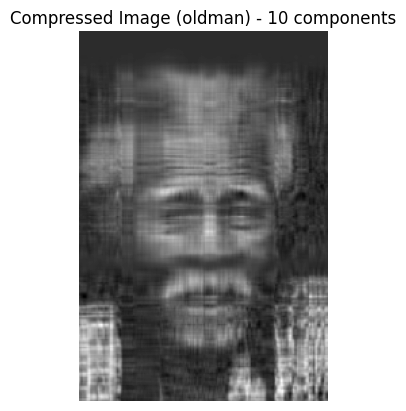

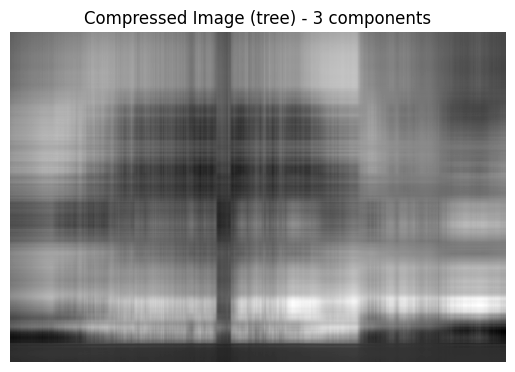

In [ ]:
# Compress oldman.bmp with 90% explained variance ratio
num_components_oldman = np.argmax(np.cumsum(variance_explained_oldman) >= 0.9) + 1
reconstructed_oldman = compress_image(oldman_image_pixels, singular_values_oldman, Vt_oldman, num_components_oldman)
display_image(reconstructed_oldman, f"Compressed Image (oldman) - {num_components_oldman} components")

# Compress tree.bmp with 90% explained variance ratio
num_components_tree = np.argmax(np.cumsum(variance_explained_tree) >= 0.9) + 1
reconstructed_tree = compress_image(tree_image_pixels, singular_values_tree, Vt_tree, num_components_tree)
display_image(reconstructed_tree, f"Compressed Image (tree) - {num_components_tree} components")

## Problem 2 ``(30 pt.)``

### 2.1 Truncate the SVD
Write the function of truncated_svd

In [ ]:
# Code cell
def truncated_svd(X, n_components):
    # Perform Singular Value Decomposition (SVD)
    U, s, Vt = np.linalg.svd(X, full_matrices=False)
    
    # Truncate the matrices to the specified number of components
    U_truncated = U[:, :n_components]
    s_truncated = s[:n_components]
    Vt_truncated = Vt[:n_components, :]
    
    # Reconstruct the matrix by multiplying the truncated matrices
    X_reconstructed = np.dot(U_truncated * s_truncated, Vt_truncated)
    
    return X_reconstructed, U_truncated, s_truncated, Vt_truncated

# Example usage:
# Define the input matrix X
X = np.random.rand(5, 5)

# Perform truncated SVD with 2 components
n_components = 2
X_reconstructed, U_truncated, s_truncated, Vt_truncated = truncated_svd(X, n_components)

### 2.2 Randomized SVD

In the following cell, you should implement the randomized SVD for the input matrix. The number of empty lines below suggests the number of lines needed for a possible solution.

In [ ]:
def sqr(A):
    Q, R = linalg.qr(A,mode="economic")
    return Q, R

In [49]:
# This function performs randomized svd using linalg from scipy
def rsvd(A, n_components, random_state, n_oversamples, n_iter):
  np.random.seed(random_state)
  ny = A.shape[1]
  P = np.random.randn(ny, n_components + n_oversamples)
  Z = A @ P
  for i in range(n_iter):
    Z = A @ (A.T @ Z)
  Q, R = np.linalg.qr(Z, mode='reduced')
  Y = A.T @ Q
  U1, S, VT = np.linalg.svd(Y, full_matrices=False)
  U = Q @ U1
  return U[:, :n_components], S[:n_components], VT[:n_components, :]


U:
[[-0.55100324  0.72782468]
 [ 0.13615852  0.56106523]
 [ 0.82332028  0.39430578]]

S:
[9.52551809 0.51430058]

VT:
[[ 1.00000000e+00  6.44185233e-09]
 [-6.44185233e-09  1.00000000e+00]]


In the following cell, implement the rsvd as you did before but this time use the LU decomposition instead of the multiplication of matrices.

In [48]:
def rsvd(A, n_components, random_state, n_oversamples, n_iter):
    np.random.seed(random_state)
    
    ny = A.shape[1]
    # Generate a random matrix P of shape (ny, n_components + n_oversamples)
    P = np.random.randn(ny, n_components + n_oversamples)
    
    for i in range(n_iter):
        Z = A @ (A.T @ P)
        Q, R = np.linalg.qr(Z, mode='reduced')  # Compute the QR decomposition of Z and get R
        Y = A.T @ Q  # Project A to the column space of Q
        U1, S, VT = np.linalg.svd(Y, full_matrices=False)  # Compute the SVD on Y
        U = Q @ U1  # Combine the bases
    
    return U[:, :n_components], S[:n_components], VT[:n_components, :]

A = np.array([[1, 2], [3, 4], [5, 6]])
n_components = 2
random_state = 42
n_oversamples = 0
n_iter = 2

U, S, VT = rsvd(A, n_components, random_state, n_oversamples, n_iter)
print("U:")
print(U)
print("\nS:")
print(S)
print("\nVT:")
print(VT)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 3)

This function performs the randomized SVD of sklearn library. Do not change this cell.

In [ ]:
def srsvd(A, n_components, random_state, n_oversamples, n_iter):
  U, s, Vh = randomized_svd(A, n_components=n_components, random_state=random_state, n_oversamples=n_oversamples, n_iter=n_iter)
  return U[:, :n_components], s[:n_components], Vh[:n_components, :]

In order to test your randomized SVD code, please run the following cell. It contains test cases to verify the correctness of your implementation.

In [ ]:
def make_matrix(m,n,k,randomstate):
    n_rows = m
    n_cols = n
    t = int(n_rows*n_cols*k)
    np.random.RandomState(randomstate)
    rr = np.random.choice(np.arange(0,n_rows),t)
    cr = np.random.choice(np.arange(0,n_cols),t)
    M = np.zeros((n_rows,n_cols))
    M[rr,cr]= 1
    return M

def base_rsvd(rsvdscipy,att):
  err = [0]*len(att)
  tim = [0]*len(att)
  for i in range(len(att)):
    M = make_matrix(att[i][0],att[i][1],0.01,att[i][3])
    start_time = time.time()
    U, s, Vh = rsvdscipy(M,att[i][2],att[i][3],att[i][4],att[i][5])
    time_length = time.time() - start_time
    M_rec = U @ np.diag(s) @ Vh
    error = np.linalg.norm(M - M_rec, ord='fro')/np.linalg.norm(M, ord='fro')
    err[i] = error
    tim[i] = time_length
    print(f"srsvd test {i+1}: error: {error:.3f}, time: {time_length:.3f}")
  print("-------------------------------")
  return err,tim

def test_rsvd(rsvdscipy,svd1):
  att = [(3000,3000,500,0,10,4),(1500,1400,500,0,10,5),(2000,5000,400,0,10,7),(6000,2600,400,0,10,3)]
  err,tim = base_rsvd(rsvdscipy,att)
  for i in range(4):
    M = make_matrix(att[i][0],att[i][1],0.01,att[i][3])
    start_time = time.time()
    U, s, Vh = svd1(M,att[i][2],att[i][3],att[i][4],att[i][5])
    time_length = time.time() - start_time
    M_rec = U @ np.diag(s) @ Vh
    error = np.linalg.norm(M - M_rec, ord='fro')/np.linalg.norm(M, ord='fro')
    if error > err[i]+0.1:
      print(f"Test{i+1}, Alg rsvd: \033[31mFailed!\033[0m because of error \n with Error {error:.3f} and time {time_length:.3f} \n ------------------")
    elif time_length > tim[i]+0.5:
      print(f"Test{i+1}, Alg rsvd: \033[31mFailed!\033[0m because of time \n with Error {error:.3f} and time {time_length:.3f} \n ------------------")
    else:
      print(f"Test{i+1}, Alg rsvd: \033[32mPassed!\033[0m \n with Error {error:.3f} and time {time_length:.3f} \n ------------------")

In [ ]:
test_rsvd(srsvd,rsvd)

NameError: name 'srsvd' is not defined

Here you can visualize the result of various svd methods on a cat image. You can also compare the time it takes for each method to run.

In [ ]:
url = 'https://images.pexels.com/photos/45201/kitty-cat-kitten-pet-45201.jpeg?cs=srgb&dl=pexels-pixabay-45201.jpg&fm=jpg'
img = Image.open(requests.get(url, stream=True).raw)

rgb_image = asarray(img)
gray_image = np.average(rgb_image, axis=2, weights=[0.2989, 0.5870, 0.1140])

In [ ]:
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
def show_images(im,k):
  start_time = time.time()
  U, s, Vh = linalg.svd(im)
  image1 = U[:, :k] @ np.diag(s[:k]) @ Vh[:k, :]
  t1 = time.time()-start_time
  start_time = time.time()
  U, s, Vh = rsvd(im,k,0,10,4)
  image2 = U @ np.diag(s) @ Vh
  t2 = time.time()-start_time
  start_time = time.time()
  U, s, Vh = nrsvd(im,k,0,10,4)
  image3 = U @ np.diag(s) @ Vh
  t3 = time.time()-start_time
  start_time = time.time()
  U, s, Vh = srsvd(im,k,0,10,4)
  image4 = U @ np.diag(s) @ Vh
  t4 = time.time()-start_time

  fig, axes = plt.subplots(nrows=2, ncols=2)

  axes[0, 0].imshow(image1, cmap='gray')
  axes[0, 0].set_title(f'svd, t = {t1:.2f}s')
  axes[0, 0].axis('off')
  axes[0, 1].imshow(image2, cmap='gray')
  axes[0, 1].set_title(f'rsvd, t = {t2:.2f}s')
  axes[0, 1].axis('off')
  axes[1, 0].imshow(image3, cmap='gray')
  axes[1, 0].set_title(f'nrsvd, t = {t3:.2f}s')
  axes[1, 0].axis('off')
  axes[1, 1].imshow(image4, cmap='gray')
  axes[1, 1].set_title(f'srsvd, t = {t4:.2f}s')
  axes[1, 1].axis('off')

  plt.tight_layout()
  plt.show()


In [ ]:
show_images(gray_image,50)

NameError: name 'show_images' is not defined

## Problem 3: PCA and its applications ``(50 pt.)``


Principal Component Analysis (PCA) is a statistical technique commonly used in data analysis and machine learning for dimensionality reduction while preserving as much variance as possible. It helps in identifying patterns in data based on the correlation between features. The goal of PCA is to reduce the number of variables of a data set, while preserving as much information (variance) as possible.

### Step 1: Standardize the Dataset
Normalize each feature in the dataset to have zero mean and unit variance to ensure each feature contributes equally:

\begin{align}
z_i = \frac{(x_i - \mu)}{\sigma}
\end{align}

### Step 2: Compute the Covariance Matrix
Construct a covariance matrix to analyze how features vary from the mean with respect to each other, which helps in identifying correlated features:

\begin{align}
C = \frac{1}{n-1} \times (X^T X)
\end{align}

where \( X \) is the standardized data matrix.

### Step 3: Calculate Eigenvalues and Eigenvectors
Solve for eigenvalues and their corresponding eigenvectors of the covariance matrix; these will determine the new axes (principal components) for the data projection:

\begin{align}
Cv = \lambda v
\end{align}

### Step 4: Sort Eigenvalues and Eigenvectors
Order the eigenvalues from largest to smallest and rank the eigenvectors accordingly. This ranking indicates the relative significance of each principal component.

### Step 5: Project Data onto Principal Components
Transform the original dataset into a new coordinate system by projecting it onto the principal eigenvectors, reducing dimensionality while retaining most of the variance:

\begin{align}
Y = XW
\end{align}

Here, \( W \) is the matrix containing the selected eigenvectors, and \( Y \) is the transformed data matrix. This final transformation results in a new dataset that highlights the most significant relationships within the original data.

---
In the section below, import all the libraries you need:

In [ ]:
# Code cell

The MNIST dataset is a large collection of handwritten digits commonly used for training various image processing systems. It contains 70,000 images of handwritten digits from 0 to 9, each represented as a 28x28 pixel grayscale image.

load the dataset and show the first 50 samples:

In [ ]:
#load the data set and fill nan value with 0
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# here show 50 first of this images

PCA is affected by scale, so you need to do some normalization on data before applying PCA.

1- Reshape the data from a 28x28 matrix to a flattened 784-element vector.

2- Subtract the mean and divide by the standard deviation for each sample.


In [ ]:
# Code cell

In this section, first obtain the covariance matrix of the data and then extract its eigenvalues and eigenvectors. Finally, sort the eigenvalues and their corresponding eigenvectors from largest to smallest.

In [ ]:
# Code cell

Now, we want to examine how many components can represent 75 percent of the total variance of the data. Note that the variance of each component corresponds to its eigenvalue.

In [ ]:
# Code cell

Now in this section, project the available data onto these components, perform dimensionality reduction, and then return the dimensions to the size of the original images. Draw an image of one of the samples for both states: before dimension reduction on the components and after it.

In [ ]:
# Code cell

In this section, define a classifier such as SVM or RandomForest, and use the test and training data to determine the accuracy of the classifier. Repeat this process for different numbers of components and examine the impact of increasing the number of components on accuracy. Note that in this section, you can use built-in functions for performing PCA and classification. Additionally, identify which number of components results in the best accuracy.

In [ ]:
# define a function that calculate PCA
def do_pca(n_components, data):

  pass

In [ ]:
#define a function that gets the X data and Y labels and returns the accuracy of ml model.
def ML_model(X, y, print_output=True):

  pass

In [ ]:
#your code to plot the accuracy of projected train data on one ml model(choose on your own reggression , random forest , ...)
#consider number of component from 2 to 101 and calculate accuracy based on number of components